---

# Real Dataset

---

# Import Libraries and Dataset:

### https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

### https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease?resource=download

In [1]:
# Import library
# Mengimpor pustaka dan dataset yang akan digunakan

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder

# Menyuppress peringatan
import warnings
warnings.simplefilter("ignore")

#  Data Preparation

In [2]:
# Membaca dataset Heart Disease dari file CSV
df = pd.read_csv(r"heart_2020_cleaned.csv")

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [3]:
# Mengubah variabel kategorikal menjadi nilai numerik

columns_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

df[columns_to_encode] = df[columns_to_encode].replace({'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})

In [4]:
df['GenHealth'] = df['GenHealth'].map({'Excellent': 4, 'Very good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})

In [5]:
df['AverageAgeCategory'] = df['AgeCategory']

In [6]:
df['AverageAgeCategory'] = df['AverageAgeCategory'].map({'18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42,
                                           '45-49': 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67,
                                           '70-74': 72, '75-79': 77, '80 or older': 85})

In [7]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

In [8]:
df.drop(['AgeCategory'], axis=1, inplace=True)

In [9]:
df.rename(columns={'AverageAgeCategory': 'Age'}, inplace=True)

In [10]:
le = LabelEncoder()
df['Race'] = le.fit_transform(df['Race'])

In [11]:
print(df.dtypes)

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
Race                  int32
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
Age                   int64
dtype: object


In [12]:
# Memeriksa nilai yang hilang atau missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
Age                 0
dtype: int64


In [13]:
df2 = pd.read_csv(r"heart.csv")
df2

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [14]:
df2.rename(columns={'target': 'HeartDisease'}, inplace=True)
df2.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

In [15]:
df2.isnull().sum()

Age             0
Sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
HeartDisease    0
dtype: int64

In [16]:
df2.drop(columns=['thal'], inplace=True)

In [17]:
df = pd.merge(df, df2, on=['Age', 'Sex', 'HeartDisease'], how='inner')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,...,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,0,16.60,1,0,0,3.0,30.0,0,0,5,...,0,140,241,0,1,123,1,0.2,1,0
1,0,16.60,1,0,0,3.0,30.0,0,0,5,...,1,130,236,0,0,174,0,0.0,1,1
2,0,16.60,1,0,0,3.0,30.0,0,0,5,...,1,130,236,0,0,174,0,0.0,1,1
3,0,16.60,1,0,0,3.0,30.0,0,0,5,...,1,130,236,0,0,174,0,0.0,1,1
4,0,16.60,1,0,0,3.0,30.0,0,0,5,...,0,140,241,0,1,123,1,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548178,1,27.41,1,0,0,7.0,0.0,1,1,3,...,2,130,231,0,1,146,0,1.8,1,3
1548179,1,27.41,1,0,0,7.0,0.0,1,1,3,...,1,128,208,1,0,140,0,0.0,2,0
1548180,1,27.41,1,0,0,7.0,0.0,1,1,3,...,1,128,208,1,0,140,0,0.0,2,0
1548181,1,27.41,1,0,0,7.0,0.0,1,1,3,...,2,130,231,0,1,146,0,1.8,1,3


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548183 entries, 0 to 1548182
Data columns (total 28 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   HeartDisease      1548183 non-null  int64  
 1   BMI               1548183 non-null  float64
 2   Smoking           1548183 non-null  int64  
 3   AlcoholDrinking   1548183 non-null  int64  
 4   Stroke            1548183 non-null  int64  
 5   PhysicalHealth    1548183 non-null  float64
 6   MentalHealth      1548183 non-null  float64
 7   DiffWalking       1548183 non-null  int64  
 8   Sex               1548183 non-null  int64  
 9   Race              1548183 non-null  int32  
 10  Diabetic          1548183 non-null  int64  
 11  PhysicalActivity  1548183 non-null  int64  
 12  GenHealth         1548183 non-null  int64  
 13  SleepTime         1548183 non-null  float64
 14  Asthma            1548183 non-null  int64  
 15  KidneyDisease     1548183 non-null  int64  
 16  

In [19]:
pd.set_option('display.max_columns', None)  
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0
1,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1
2,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1
3,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1
4,0,16.60,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548178,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,2,130,231,0,1,146,0,1.8,1,3
1548179,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,1,128,208,1,0,140,0,0.0,2,0
1548180,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,1,128,208,1,0,140,0,0.0,2,0
1548181,1,27.41,1,0,0,7.0,0.0,1,1,3,1,0,1,6.0,1,0,0,62,2,130,231,0,1,146,0,1.8,1,3


# Data Preprocessing

In [20]:
# Membuat kolom baru 'age_group' berdasarkan 'AverageAgeCategory'

min_age = df['Age'].min()
median_age = df['Age'].median()
max_age = df['Age'].max()

# Display hasil
print("Minimum age:", min_age)
print("Median age:", median_age)
print("Maximum age:", max_age)

Minimum age: 37
Median age: 57.0
Maximum age: 77


In [21]:
# Buat kolom baru 'age_group' berdasarkan 'AverageAgeCategory'
df['age_group'] = pd.cut(df['Age'], bins=[21, 40, 61, float('inf')], labels=['21-39', '40-60', '61+'], right=False)

# Display dataframe yang sudah di update
print(df)

         HeartDisease    BMI  Smoking  AlcoholDrinking  Stroke  \
0                   0  16.60        1                0       0   
1                   0  16.60        1                0       0   
2                   0  16.60        1                0       0   
3                   0  16.60        1                0       0   
4                   0  16.60        1                0       0   
...               ...    ...      ...              ...     ...   
1548178             1  27.41        1                0       0   
1548179             1  27.41        1                0       0   
1548180             1  27.41        1                0       0   
1548181             1  27.41        1                0       0   
1548182             1  27.41        1                0       0   

         PhysicalHealth  MentalHealth  DiffWalking  Sex  Race  Diabetic  \
0                   3.0          30.0            0    0     5         1   
1                   3.0          30.0            0    0  

In [22]:
# Hitung jumlah individu dalam setiap kelompok usia
age_group_counts = df['age_group'].value_counts()

# Menampilkan hitungan
print("Counts of individuals in each age group:")
print(age_group_counts)

Counts of individuals in each age group:
age_group
40-60    820237
61+      727058
21-39       888
Name: count, dtype: int64


In [23]:
# Membuat DataFrame baru untuk setiap kelompok usia
young = df[df['age_group'] == '21-39']
middle = df[df['age_group'] == '40-60']
old = df[df['age_group'] == '61+']

# Menampilkan beberapa baris pertama dari setiap DataFrame baru
print("Data for age group 21-39:")
young.head()


Data for age group 21-39:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
4998,1,46.03,0,0,0,0.0,0.0,0,1,2,1,1,0,7.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
4999,1,46.03,0,0,0,0.0,0.0,0,1,2,1,1,0,7.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
5000,1,46.03,0,0,0,0.0,0.0,0,1,2,1,1,0,7.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
6527,1,45.33,0,0,0,6.0,10.0,0,1,5,0,1,1,6.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39
6528,1,45.33,0,0,0,6.0,10.0,0,1,5,0,1,1,6.0,0,0,0,37,2,130,250,0,1,187,0,3.5,0,0,21-39


In [24]:
print("\nData for age group 50-60:")
middle.head()


Data for age group 50-60:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
0,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0,40-60
1,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1,40-60
2,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1,40-60
3,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,1,130,236,0,0,174,0,0.0,1,1,40-60
4,0,16.6,1,0,0,3.0,30.0,0,0,5,1,1,3,5.0,1,0,1,57,0,140,241,0,1,123,1,0.2,1,0,40-60


In [25]:
print("\nData for age group 64+:")
old.head()


Data for age group 64+:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
6,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,2,152,212,0,0,150,0,0.8,1,0,61+
7,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,0,100,299,0,0,125,1,0.9,1,2,61+
8,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,0,160,286,0,0,108,1,1.5,1,3,61+
9,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,0,100,299,0,0,125,1,0.9,1,2,61+
10,0,26.58,1,0,0,20.0,30.0,0,1,5,1,1,1,8.0,1,0,0,67,2,152,212,0,0,150,0,0.8,1,0,61+


In [26]:
# Menghapus baris dengan nilai yang hilang

df.dropna(inplace=True)

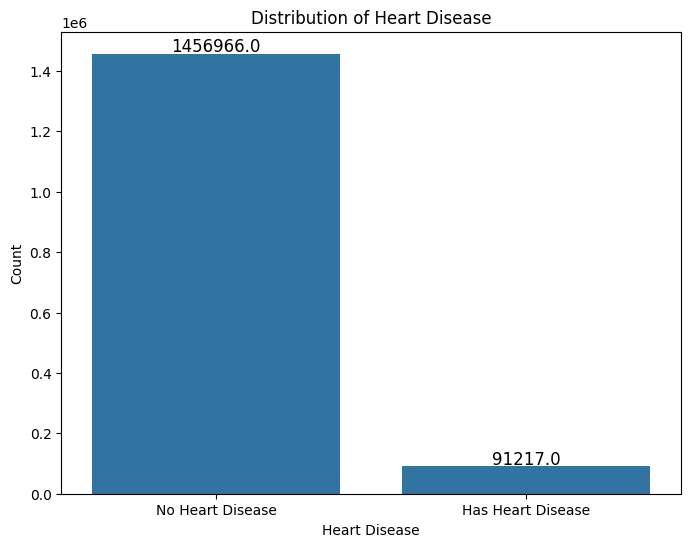

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(['No Heart Disease', 'Has Heart Disease'])

plt.show()

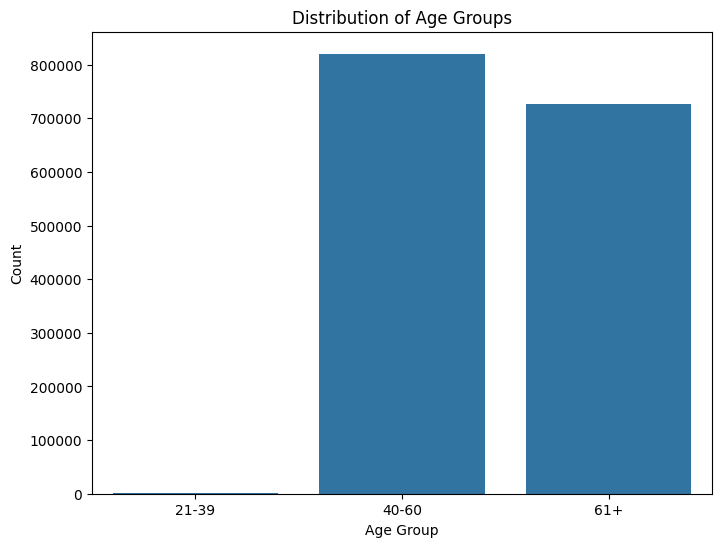

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Data Processing

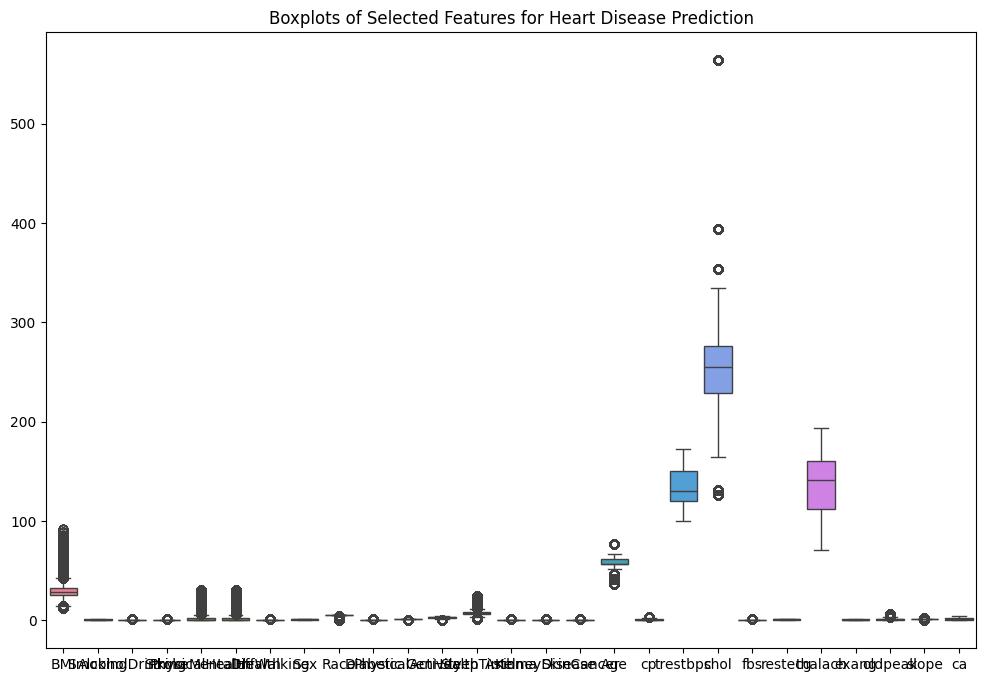

In [30]:
# Kolom yang berkaitan dengan kesehatan dan gaya hidup
columns_of_interest = [
    'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
    'MentalHealth', 'DiffWalking', 'Sex', 'Race', 'Diabetic', 'PhysicalActivity',
    'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Age',
    'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak',
    'slope', 'ca'
]

# Membuat boxplot untuk kolom yang dipilih
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[columns_of_interest])
plt.title('Boxplots of Selected Features for Heart Disease Prediction')
plt.show()

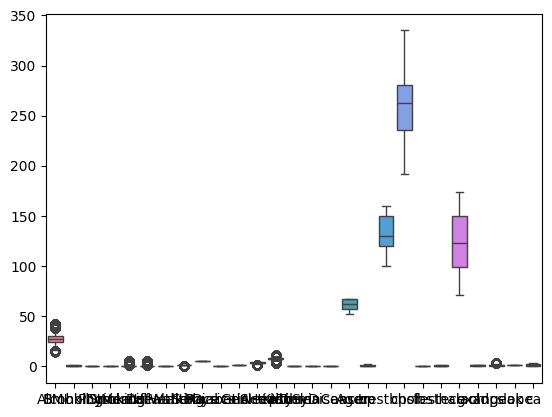

In [31]:
# Menghitung IQR dan menghapus outlier dari dataset

Q1 = df[columns_of_interest].quantile(0.25)
Q3 = df[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

outlier_threshold = 1.5

outlier_mask = ~((df[columns_of_interest] < (Q1 - outlier_threshold * IQR)) | (df[columns_of_interest] > (Q3 + outlier_threshold * IQR))).any(axis=1)

df_no_outliers = df[outlier_mask]

sns.boxplot(data=df_no_outliers[columns_of_interest])
plt.show()

In [32]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df_no_outliers['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
0    247062
1      2523
Name: count, dtype: int64


In [33]:
desired_counts = {'1': 2523, '0': 2523}

# Inisialisasi DataFrame kosong
df_measured = pd.DataFrame()

# Loop through each class and select the desired count from the top
for class_value, count in desired_counts.items():
    # Filter the original DataFrame for the specific class
    class_df = df_no_outliers[df_no_outliers['HeartDisease'] == int(class_value)]
    
    # Take the top 'count' samples
    sampled_data = class_df.head(count)
    
    # Menambahkan data sampel ke DataFrame baru
    df_measured = pd.concat([df_measured, sampled_data])

# Mengacak DataFrame untuk mencampur kelas
df_measured = df_measured.sample(frac=1, random_state=42).reset_index(drop=True)

In [34]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df_measured['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
0    2523
1    2523
Name: count, dtype: int64


In [35]:
# Health-related Features
health_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Lifestyle and Behavior
lifestyle_features = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']

# Medical Tests and Indicators
medical_tests = ['Stroke', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# Demographic and Personal Information
demographic_info = ['Sex', 'Race', 'Age']

# Functional Abilities
functional_abilities = ['DiffWalking']


In [36]:
feature_cols = demographic_info + lifestyle_features + medical_tests

In [37]:
# Membagi dataset menjadi data latih dan data uji

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_measured['age_group_encoded'] = encoder.fit_transform(df_measured['age_group'])

X = df_measured[feature_cols]
y = df_measured['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL EVALUATION

## Logistic Regression

### Table Sampling

In [38]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

     Train Size     Test Size Total Samples  Accuracy
0  4036 (80.0%)  1010 (20.0%)          5046  0.981188
1  3532 (70.0%)  1514 (30.0%)          5046  0.991413
2  3027 (60.0%)  2019 (40.0%)          5046  0.975731


### Model

In [39]:
noise_level = 0.25

In [40]:
num_samples = len(y_train)
num_samples_to_flip = int(noise_level * num_samples)
flip_indices = np.random.choice(num_samples, num_samples_to_flip, replace=False)
flip_indices = np.where(flip_indices < len(y_train), flip_indices, flip_indices % len(y_train))

In [41]:
y_train_noisy = y_train.copy()
y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 2, 10, 100],
    'penalty': ['l1', 'l2']
}

In [44]:
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(X_train, y_train_noisy)

LogisticRegression(max_iter=1000)

In [45]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=50)

In [46]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [47]:
grid_search_logistic = GridSearchCV(modelLogistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 2, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [48]:
best_model = grid_search_logistic.best_estimator_

In [49]:
y_pred = best_model.predict(X_test)

In [50]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Akurasi model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriks konfusi yang menunjukkan hasil prediksi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.932639920752848
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.87      0.93      1029
           1       0.88      1.00      0.94       990

    accuracy                           0.93      2019
   macro avg       0.94      0.93      0.93      2019
weighted avg       0.94      0.93      0.93      2019

Confusion Matrix:
 [[893 136]
 [  0 990]]


In [51]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                            
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.06736007924715205
R-squared: 0.7304591100509468
Mean Absolute Error: 0.06736007924715205


In [52]:
from sklearn.metrics import roc_auc_score

# Memprediksi probabilitas untuk kelas positif pada training set
y_train_prob = modelLogistic.predict_proba(X_train)[:, 1]

# Memprediksi probabilitas untuk kelas positif pada testing set
y_test_prob = modelLogistic.predict_proba(X_test)[:, 1]

# Hitung AUC untuk set pelatihan
auc_train = roc_auc_score(y_train, y_train_prob)

# Hitung AUC untuk set pengujian
auc_test = roc_auc_score(y_test, y_test_prob)

# Mencetak skor AUC
print("AUC for Training Set:", auc_train)
print("AUC for Testing Set:", auc_test)


AUC for Training Set: 0.9994738685116635
AUC for Testing Set: 0.9997064915432263


## Lasso Regression

### Table Sampling

In [53]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Lasso(max_iter=1000)  # Using Lasso Regression
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    # Convert predicted values to binary predictions (0 or 1)
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

     Train Size     Test Size Total Samples  Accuracy
0  4036 (80.0%)  1010 (20.0%)          5046  0.907921
1  3532 (70.0%)  1514 (30.0%)          5046  0.858653
2  3027 (60.0%)  2019 (40.0%)          5046  0.861317


### Model

In [54]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [55]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [56]:
# Inisialisasi model Lasso dengan alpha (parameter regularisasi)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train_noisy)

Lasso()

In [57]:
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lasso.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [58]:
best_model_lasso = grid_search_lasso.best_estimator_

In [59]:
# Prediksi nilai target pada data uji
y_pred_lasso = best_model_lasso.predict(X_test)

# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_lasso_binary = (y_pred_lasso > 0.5).astype(int)

In [60]:
# Evaluasi model Lasso
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
print("Lasso Regression Accuracy:", accuracy_lasso)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Lasso Model:\n", classification_report(y_test, y_pred_lasso_binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Lasso Model:\n", confusion_matrix(y_test, y_pred_lasso_binary))

Lasso Regression Accuracy: 0.9732540861812778
Classification Report - Lasso Model:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97      1029
           1       0.95      1.00      0.97       990

    accuracy                           0.97      2019
   macro avg       0.97      0.97      0.97      2019
weighted avg       0.97      0.97      0.97      2019

Confusion Matrix - Lasso Model:
 [[975  54]
 [  0 990]]


In [61]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                         
mse = mean_squared_error(y_test, y_pred_lasso_binary)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_lasso_binary)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_lasso_binary)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.02674591381872214
R-squared: 0.8929764113437583
Mean Absolute Error: 0.02674591381872214


In [62]:
# AUC for Lasso model

# Prediksi probabilitas pada data latih dan uji
y_train_prob_lasso = lasso_model.predict(X_train)
y_test_prob_lasso = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_lasso = roc_auc_score(y_train, y_train_prob_lasso)
auc_test_lasso = roc_auc_score(y_test, y_test_prob_lasso)

# Menampilkan AUC scores
print("AUC for Training Set - Lasso Model:", auc_train_lasso)
print("AUC for Testing Set - Lasso Model:", auc_test_lasso)

AUC for Training Set - Lasso Model: 0.9020059363350336
AUC for Testing Set - Lasso Model: 0.9210766557705333


## Ridge Regression

### Table Sampling

In [63]:
from sklearn.linear_model import Ridge

results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Ridge(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


     Train Size     Test Size Total Samples  Accuracy
0  4036 (80.0%)  1010 (20.0%)          5046  0.986139
1  3532 (70.0%)  1514 (30.0%)          5046  0.973580
2  3027 (60.0%)  2019 (40.0%)          5046  0.979198


### Model

In [64]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [65]:
# Inisialisasi model Ridge dengan alpha (parameter regularisasi)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Buat dan sesuaikan model Ridge dengan alpha (parameter regularisasi)
model_ridge = Ridge(alpha=1.0)  
model_ridge.fit(X_train, y_train_noisy)

Ridge()

In [66]:
grid_search_ridge = GridSearchCV(model_ridge, param_grid_ridge, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_ridge.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [67]:
best_model_ridge = grid_search_ridge.best_estimator_

In [68]:
# Prediksi nilai target pada data uji menggunakan model Ridge
y_pred_ridge = best_model_ridge.predict(X_test)

In [69]:
# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_Ridge_Binary = (y_pred_ridge > 0.5).astype(int)

In [70]:
# Evaluasi model Ridge
accuracy_binary = accuracy_score(y_test, y_pred_Ridge_Binary)
print("Ridge Regression Accuracy:", accuracy_binary)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Ridge Model:\n", classification_report(y_test, y_pred_Ridge_Binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Ridge Model:\n", confusion_matrix(y_test, y_pred_Ridge_Binary))

Ridge Regression Accuracy: 0.9826646854878652
Classification Report - Ridge Model:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1029
           1       0.97      1.00      0.98       990

    accuracy                           0.98      2019
   macro avg       0.98      0.98      0.98      2019
weighted avg       0.98      0.98      0.98      2019

Confusion Matrix - Ridge Model:
 [[994  35]
 [  0 990]]


In [71]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                                    
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0312982850302852
R-squared: 0.874760129512483
Mean Absolute Error: 0.12123213576003021


In [72]:
# AUC (Area Under the Curve) untuk model Ridge
# Prediksi probabilitas pada data latih dan uji
y_train_prob_ridge = lasso_model.predict(X_train)
y_test_prob_ridge = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_ridge = roc_auc_score(y_train, y_train_prob_ridge)
auc_test_ridge = roc_auc_score(y_test, y_test_prob_ridge)

# Menampilkan AUC scores
print("AUC for Training Set - ridge Model:", auc_train_ridge)
print("AUC for Testing Set - ridge Model:", auc_test_ridge)

AUC for Training Set - ridge Model: 0.9020059363350336
AUC for Testing Set - ridge Model: 0.9210766557705333


# Model Comparison:

In [73]:
# Fungsi untuk plotting learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Testing Score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, fit_times_mean)
    plt.title('Scalability of the Model')
    plt.xlabel('Training Examples')
    plt.ylabel('Fit Time (s)')

    plt.tight_layout()
    plt.show()

### Logistic Comparison

In [74]:
# Prediksi probabilitas kelas positif pada data latih
y_train_prob_logistic = modelLogistic.predict_proba(X_train)[:, 1]

# ROC AUC Score pada data latih
roc_auc_train = roc_auc_score(y_train, y_train_prob_logistic)

In [75]:
# ROC AUC Score pada data uji
roc_auc_logistic = roc_auc_score(y_test, modelLogistic.predict_proba(X_test)[:, 1])
print("ROC AUC Score - Logistic Regression:", roc_auc_logistic)

ROC AUC Score - Logistic Regression: 0.9997064915432263


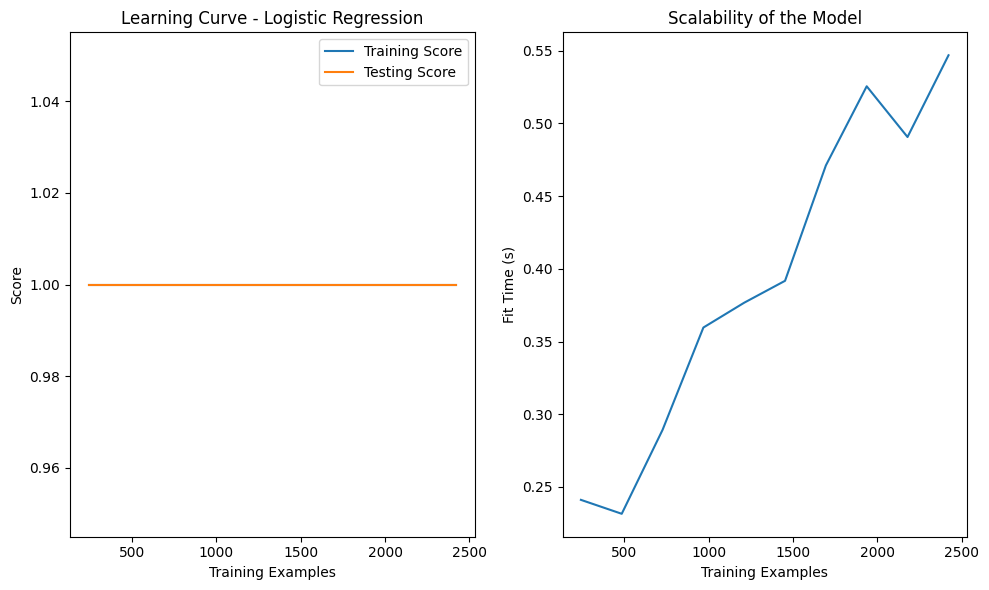

In [76]:
# Plotting learning curve untuk model Logistic Regression
plot_learning_curve(modelLogistic, X_train, y_train, 'Logistic Regression')

### Lasso Comparison

In [77]:
# ROC AUC Score untuk model Lasso Regression pada data uji
roc_auc_lasso = roc_auc_score(y_test, lasso_model.predict(X_test))
print("ROC AUC Score - Lasso Regression:", roc_auc_lasso)

ROC AUC Score - Lasso Regression: 0.9210766557705333


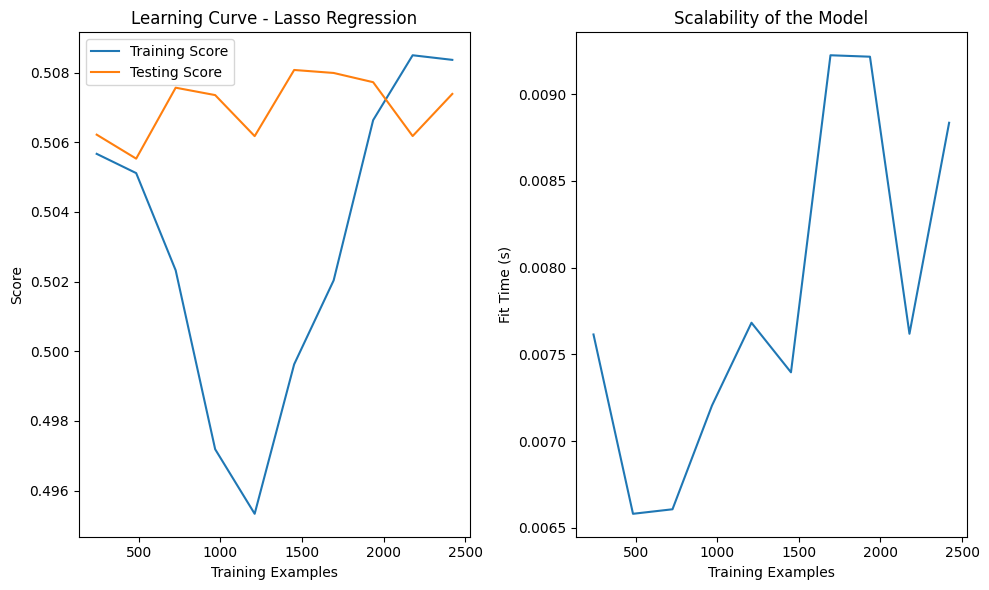

In [78]:
# Plotting learning curve untuk model Lasso Regression
plot_learning_curve(lasso_model, X_train, y_train, 'Lasso Regression')

## Ridge Comparison

In [79]:
# ROC AUC Score untuk model Ridge Regression pada data uji
roc_auc_ridge = roc_auc_score(y_test, model_ridge.predict(X_test))
print("ROC AUC Score - Ridge Regression:", roc_auc_ridge)

ROC AUC Score - Ridge Regression: 0.9995828057052547


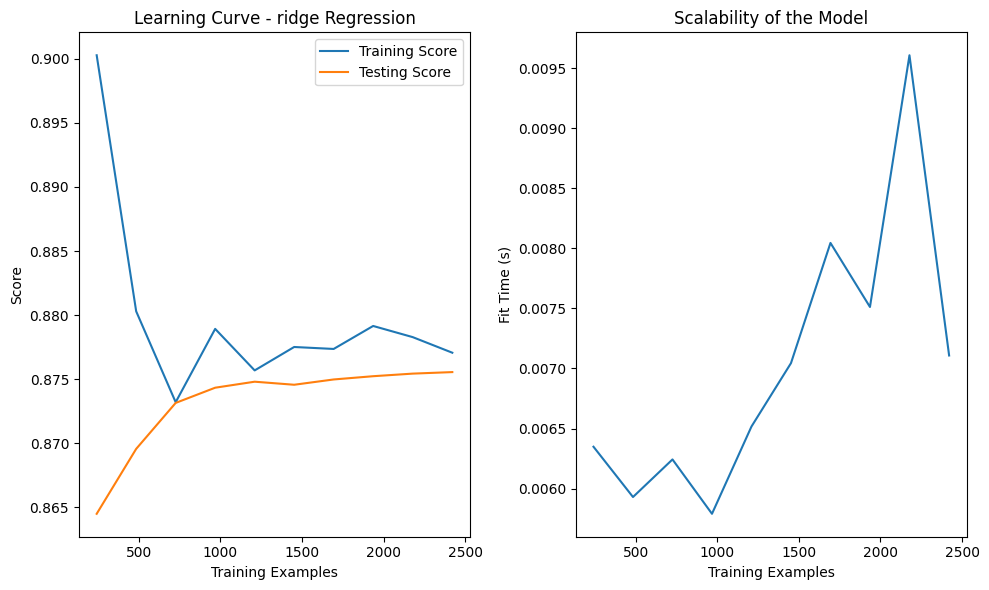

In [80]:
# Plotting learning curve untuk model Ridge Regression
plot_learning_curve(model_ridge, X_train, y_train, 'ridge Regression')

----

# Dummy Dataset

----

In [428]:
num_rows = 20000

dummy_data = {
    'HeartDisease': np.random.choice(['Yes', 'No'], size=num_rows),
    'BMI': np.random.uniform(15, 40, size=num_rows),
    'Smoking': np.random.choice(['Yes', 'No'], size=num_rows),
    'AlcoholDrinking': np.random.choice(['Yes', 'No'], size=num_rows),
    'Stroke': np.random.choice(['Yes', 'No'], size=num_rows),
    'PhysicalHealth': np.random.uniform(0, 30, size=num_rows),
    'MentalHealth': np.random.uniform(0, 30, size=num_rows),
    'DiffWalking': np.random.choice(['Yes', 'No'], size=num_rows),
    'Sex': np.random.choice(['Male', 'Female'], size=num_rows),
    'AgeCategory': np.random.choice(['20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 or older'], size=num_rows),
    'Race': np.random.choice(['White', 'Black or African American', 'Asian', 'Hispanic'], size=num_rows),
    'Diabetic': np.random.choice(['Yes', 'No'], size=num_rows),
    'PhysicalActivity': np.random.choice(['Yes', 'No'], size=num_rows),
    'GenHealth': np.random.choice(['Poor', 'Fair', 'Good', 'Very good', 'Excellent'], size=num_rows),
    'SleepTime': np.random.uniform(4, 12, size=num_rows),
    'Asthma': np.random.choice(['Yes', 'No'], size=num_rows),
    'KidneyDisease': np.random.choice(['Yes', 'No'], size=num_rows),
    'SkinCancer': np.random.choice(['Yes', 'No'], size=num_rows)
}

num_yes_heart_disease = np.sum(dummy_data['HeartDisease'] == 'Yes')
num_no_heart_disease = num_rows - num_yes_heart_disease
num_heart_disease = min(num_yes_heart_disease, num_no_heart_disease)
dummy_data['HeartDisease'][:num_heart_disease] = ['Yes'] * num_heart_disease
dummy_data['HeartDisease'][num_heart_disease:num_heart_disease * 2] = ['No'] * num_heart_disease

num_female = np.sum(dummy_data['Sex'] == 'Female')
num_male = num_rows - num_female
num_sex = min(num_female, num_male)
dummy_data['Sex'][:num_sex] = ['Female'] * num_sex
dummy_data['Sex'][num_sex:num_sex * 2] = ['Male'] * num_sex

df = pd.DataFrame(dummy_data)

print(df)


      HeartDisease        BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0              Yes  36.640786      No              No    Yes       22.880649   
1              Yes  23.130175      No              No     No       21.105601   
2              Yes  26.493990     Yes              No     No       24.956122   
3              Yes  23.049606      No             Yes     No        0.118519   
4              Yes  30.197520      No             Yes    Yes       27.013435   
...            ...        ...     ...             ...    ...             ...   
19995           No  24.576547     Yes              No     No        3.578159   
19996          Yes  30.435398      No             Yes     No        3.567762   
19997           No  26.145544     Yes              No    Yes        3.800851   
19998           No  19.811129     Yes             Yes    Yes       25.096200   
19999          Yes  21.173893      No             Yes    Yes        4.994108   

       MentalHealth DiffWalking     Sex

In [429]:
# Mengubah variabel kategorikal menjadi nilai numerik

columns_to_encode = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Diabetic', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']

df[columns_to_encode] = df[columns_to_encode].replace({'Yes': 1, 'No': 0, 'No, borderline diabetes': 0, 'Yes (during pregnancy)': 1})

In [430]:
df['GenHealth'] = df['GenHealth'].map({'Excellent': 4, 'Very good': 3, 'Good': 2, 'Fair': 1, 'Poor': 0})

In [431]:
df['AverageAgeCategory'] = df['AgeCategory']

In [432]:
df['AverageAgeCategory'] = df['AverageAgeCategory'].map({'18-24': 21, '25-29': 27, '30-34': 32, '35-39': 37, '40-44': 42,
                                           '45-49': 47, '50-54': 52, '55-59': 57, '60-64': 62, '65-69': 67,
                                           '70-74': 72, '75-79': 77, '80 or older': 85})

In [433]:
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

In [434]:
df.drop(['AgeCategory'], axis=1, inplace=True)

In [435]:
df.rename(columns={'AverageAgeCategory': 'Age'}, inplace=True)

In [436]:
le = LabelEncoder()
df['Race'] = le.fit_transform(df['Race'])

In [437]:
print(df.dtypes)

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke                int64
PhysicalHealth      float64
MentalHealth        float64
DiffWalking           int64
Sex                   int64
Race                  int32
Diabetic              int64
PhysicalActivity      int64
GenHealth             int64
SleepTime           float64
Asthma                int64
KidneyDisease         int64
SkinCancer            int64
Age                 float64
dtype: object


In [438]:
# Memeriksa nilai yang hilang atau missing values
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
HeartDisease           0
BMI                    0
Smoking                0
AlcoholDrinking        0
Stroke                 0
PhysicalHealth         0
MentalHealth           0
DiffWalking            0
Sex                    0
Race                   0
Diabetic               0
PhysicalActivity       0
GenHealth              0
SleepTime              0
Asthma                 0
KidneyDisease          0
SkinCancer             0
Age                 1581
dtype: int64


In [439]:
# Define the ranges for each column
ranges = {
    'age': [30, 80],
    'sex': [0, 1],
    'cp': [0, 3],
    'trestbps': [90, 180],
    'chol': [150, 350],
    'fbs': [0, 1],
    'restecg': [0, 2],
    'thalach': [60, 220],
    'exang': [0, 1],
    'oldpeak': [0.0, 6.0],
    'slope': [0, 2],
    'ca': [0, 4],
    'thal': [0, 3],
    'target': [0, 1]
}

num_rows = 1025
dummy_data = {}

for col, (min_val, max_val) in ranges.items():
    if col == 'target':
        counts = np.random.choice([0, 1], size=num_rows, p=[0.7, 0.3])
        dummy_data[col] = counts
    else:
        dummy_data[col] = np.random.randint(min_val, max_val + 1, size=num_rows)

df2 = pd.DataFrame(dummy_data)

print(df2)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      47    1   1       111   337    0        0      186      0        4   
1      37    0   1       108   250    1        1      122      0        3   
2      56    1   0       118   180    0        2      102      1        6   
3      37    1   0       102   240    1        0      144      1        5   
4      31    0   1       163   218    0        2      120      0        0   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   63    1   2        96   155    0        0      119      1        3   
1021   70    0   3       108   154    1        1      160      1        4   
1022   51    0   0       137   260    0        2      108      0        2   
1023   80    0   3       150   235    1        1      157      1        3   
1024   34    0   0       169   293    1        1      109      0        1   

      slope  ca  thal  target  
0         2   0     2       1  
1         0

In [440]:
df2.rename(columns={'target': 'HeartDisease'}, inplace=True)
df2.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

In [441]:
df2.isnull().sum()

Age             0
Sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
HeartDisease    0
dtype: int64

In [442]:
df2.drop(columns=['thal'], inplace=True)

In [443]:
df = pd.merge(df, df2, on=['Age', 'Sex', 'HeartDisease'], how='inner')
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,2,138,323,0,0,195,1,2,1,3
1,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,1,123,317,0,1,103,1,0,2,2
2,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,2,140,339,0,0,108,0,4,1,1
3,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,1,137,322,1,1,106,0,1,0,2
4,1,23.130175,0,0,0,21.105601,16.622081,1,0,0,0,1,4,11.102405,1,0,0,67.0,2,138,323,0,0,195,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78678,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,1,111,337,0,0,186,0,4,2,0
78679,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,0,141,264,1,1,198,0,1,1,2
78680,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,2,143,265,1,1,77,1,1,1,0
78681,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,2,129,214,0,2,116,0,4,2,4


In [444]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78683 entries, 0 to 78682
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   HeartDisease      78683 non-null  int64  
 1   BMI               78683 non-null  float64
 2   Smoking           78683 non-null  int64  
 3   AlcoholDrinking   78683 non-null  int64  
 4   Stroke            78683 non-null  int64  
 5   PhysicalHealth    78683 non-null  float64
 6   MentalHealth      78683 non-null  float64
 7   DiffWalking       78683 non-null  int64  
 8   Sex               78683 non-null  int64  
 9   Race              78683 non-null  int32  
 10  Diabetic          78683 non-null  int64  
 11  PhysicalActivity  78683 non-null  int64  
 12  GenHealth         78683 non-null  int64  
 13  SleepTime         78683 non-null  float64
 14  Asthma            78683 non-null  int64  
 15  KidneyDisease     78683 non-null  int64  
 16  SkinCancer        78683 non-null  int64 

In [445]:
pd.set_option('display.max_columns', None)  
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca
0,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,2,138,323,0,0,195,1,2,1,3
1,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,1,123,317,0,1,103,1,0,2,2
2,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,2,140,339,0,0,108,0,4,1,1
3,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,1,137,322,1,1,106,0,1,0,2
4,1,23.130175,0,0,0,21.105601,16.622081,1,0,0,0,1,4,11.102405,1,0,0,67.0,2,138,323,0,0,195,1,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78678,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,1,111,337,0,0,186,0,4,2,0
78679,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,0,141,264,1,1,198,0,1,1,2
78680,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,2,143,265,1,1,77,1,1,1,0
78681,1,21.173893,0,1,1,4.994108,26.937842,1,1,0,0,0,3,5.286323,0,1,1,47.0,2,129,214,0,2,116,0,4,2,4


# Data Preprocessing

In [446]:
# Membuat kolom baru 'age_group' berdasarkan 'AverageAgeCategory'

min_age = df['Age'].min()
median_age = df['Age'].median()
max_age = df['Age'].max()

# Display hasil
print("Minimum age:", min_age)
print("Median age:", median_age)
print("Maximum age:", max_age)

Minimum age: 32.0
Median age: 52.0
Maximum age: 77.0


In [447]:
# Buat kolom baru 'age_group' berdasarkan 'AverageAgeCategory'
df['age_group'] = pd.cut(df['Age'], bins=[21, 40, 61, float('inf')], labels=['21-39', '40-60', '61+'], right=False)

# Display dataframe yang sudah di update
print(df)

       HeartDisease        BMI  Smoking  AlcoholDrinking  Stroke  \
0                 1  36.640786        0                0       1   
1                 1  36.640786        0                0       1   
2                 1  36.640786        0                0       1   
3                 1  36.640786        0                0       1   
4                 1  23.130175        0                0       0   
...             ...        ...      ...              ...     ...   
78678             1  21.173893        0                1       1   
78679             1  21.173893        0                1       1   
78680             1  21.173893        0                1       1   
78681             1  21.173893        0                1       1   
78682             1  21.173893        0                1       1   

       PhysicalHealth  MentalHealth  DiffWalking  Sex  Race  Diabetic  \
0           22.880649     14.247526            1    0     1         1   
1           22.880649     14.247526  

In [448]:
# Hitung jumlah individu dalam setiap kelompok usia
age_group_counts = df['age_group'].value_counts()

# Menampilkan hitungan
print("Counts of individuals in each age group:")
print(age_group_counts)

Counts of individuals in each age group:
age_group
40-60    32039
61+      26072
21-39    20572
Name: count, dtype: int64


In [449]:
# Membuat DataFrame baru untuk setiap kelompok usia
young = df[df['age_group'] == '21-39']
middle = df[df['age_group'] == '40-60']
old = df[df['age_group'] == '61+']

# Menampilkan beberapa baris pertama dari setiap DataFrame baru
print("Data for age group 21-39:")
young.head()


Data for age group 21-39:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
9,1,23.049606,0,1,0,0.118519,10.076837,0,0,0,0,1,2,7.122998,1,0,1,32.0,2,136,227,0,2,212,0,1,1,3,21-39
10,1,23.049606,0,1,0,0.118519,10.076837,0,0,0,0,1,2,7.122998,1,0,1,32.0,1,90,168,1,1,152,1,1,2,1,21-39
11,1,23.049606,0,1,0,0.118519,10.076837,0,0,0,0,1,2,7.122998,1,0,1,32.0,1,175,215,1,1,198,1,2,2,3,21-39
12,1,23.049606,0,1,0,0.118519,10.076837,0,0,0,0,1,2,7.122998,1,0,1,32.0,0,168,157,1,2,161,1,5,0,3,21-39
18,1,21.241592,1,1,0,23.236394,3.613467,0,0,3,0,0,3,7.979546,0,0,0,37.0,2,117,190,0,1,87,1,2,0,0,21-39


In [450]:
print("\nData for age group 50-60:")
middle.head()


Data for age group 50-60:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
13,1,30.197520,0,1,1,27.013435,19.881230,0,0,3,1,0,4,5.590249,0,1,0,52.0,2,94,298,1,2,127,1,2,1,4,40-60
23,1,27.015646,0,1,1,1.741287,8.946628,1,0,2,0,0,3,7.161712,0,1,0,52.0,2,94,298,1,2,127,1,2,1,4,40-60
24,1,17.648167,0,0,0,5.195345,12.027494,0,0,2,1,1,1,8.223089,0,0,0,52.0,2,94,298,1,2,127,1,2,1,4,40-60
30,1,21.309541,1,0,0,16.155899,10.197073,0,0,0,0,0,3,8.400346,1,0,1,57.0,3,116,264,0,1,134,1,2,0,2,40-60
31,1,21.309541,1,0,0,16.155899,10.197073,0,0,0,0,0,3,8.400346,1,0,1,57.0,3,124,216,0,1,74,0,6,2,2,40-60


In [451]:
print("\nData for age group 64+:")
old.head()


Data for age group 64+:


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,age_group
0,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,2,138,323,0,0,195,1,2,1,3,61+
1,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,1,123,317,0,1,103,1,0,2,2,61+
2,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,2,140,339,0,0,108,0,4,1,1,61+
3,1,36.640786,0,0,1,22.880649,14.247526,1,0,1,1,1,4,8.975228,1,0,0,67.0,1,137,322,1,1,106,0,1,0,2,61+
4,1,23.130175,0,0,0,21.105601,16.622081,1,0,0,0,1,4,11.102405,1,0,0,67.0,2,138,323,0,0,195,1,2,1,3,61+


In [452]:
# Menghapus baris dengan nilai yang hilang

df.dropna(inplace=True)

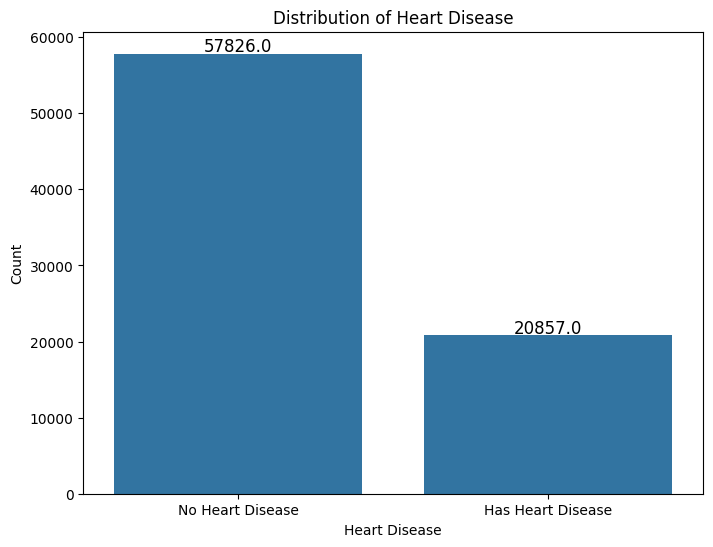

In [453]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='HeartDisease', data=df)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

ax.set_xticklabels(['No Heart Disease', 'Has Heart Disease'])

plt.show()

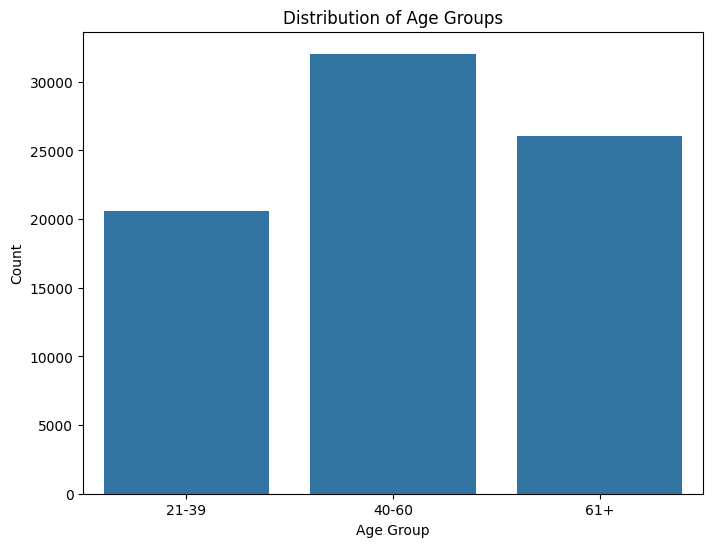

In [454]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='age_group')
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

# Data Processing

In [455]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
0    57826
1    20857
Name: count, dtype: int64


In [484]:
desired_counts = {'1': 2523, '0': 2523}

# Inisialisasi DataFrame kosong
df_measured = pd.DataFrame()

# Loop through each class and select the desired count from the top
for class_value, count in desired_counts.items():
    # Filter the original DataFrame for the specific class
    class_df = df_no_outliers[df_no_outliers['HeartDisease'] == int(class_value)]
    
    # Take the top 'count' samples
    sampled_data = class_df.head(count)
    
    # Menambahkan data sampel ke DataFrame baru
    df_measured = pd.concat([df_measured, sampled_data])

# Mengacak DataFrame untuk mencampur kelas
df_measured = df_measured.sample(frac=1, random_state=42).reset_index(drop=True)

In [485]:
# Pemeriksaan Jumlah Penyakit Jantung
heart_disease_counts = df_measured['HeartDisease'].value_counts()

print("Heart Disease Counts:")
print(heart_disease_counts)

Heart Disease Counts:
HeartDisease
0    2109
1    1249
Name: count, dtype: int64


In [486]:
# Health-related Features
health_features = ['BMI', 'PhysicalHealth', 'MentalHealth', 'GenHealth', 'Diabetic', 'Asthma', 'KidneyDisease', 'SkinCancer']

# Lifestyle and Behavior
lifestyle_features = ['Smoking', 'AlcoholDrinking', 'PhysicalActivity', 'SleepTime']

# Medical Tests and Indicators
medical_tests = ['Stroke', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca']

# Demographic and Personal Information
demographic_info = ['Sex', 'Race', 'Age']

# Functional Abilities
functional_abilities = ['DiffWalking']


In [487]:
feature_cols = demographic_info + lifestyle_features + medical_tests

In [488]:
# Membagi dataset menjadi data latih dan data uji

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_measured['age_group_encoded'] = encoder.fit_transform(df_measured['age_group'])

X = df_measured[feature_cols]
y = df_measured['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODEL EVALUATION

## Logistic Regression

### Table Sampling

In [489]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

     Train Size     Test Size Total Samples  Accuracy
0  2686 (80.0%)   672 (20.0%)          3358  0.974702
1  2350 (70.0%)  1008 (30.0%)          3358  0.977183
2  2014 (60.0%)  1344 (40.0%)          3358  0.980655


### Model

In [490]:
noise_level = 0.25

In [491]:
num_samples = len(y_train)
num_samples_to_flip = int(noise_level * num_samples)
flip_indices = np.random.choice(num_samples, num_samples_to_flip, replace=False)
flip_indices = np.where(flip_indices < len(y_train), flip_indices, flip_indices % len(y_train))

In [492]:
y_train_noisy = y_train.copy()
y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]

In [493]:
from sklearn.model_selection import GridSearchCV

In [494]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 2, 10, 100],
    'penalty': ['l1', 'l2']
}

In [495]:
modelLogistic = LogisticRegression(max_iter=1000)
modelLogistic.fit(X_train, y_train_noisy)

LogisticRegression(max_iter=1000)

In [496]:
from imblearn.under_sampling import RandomUnderSampler

undersampler = RandomUnderSampler(random_state=50)

In [497]:
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

In [498]:
grid_search_logistic = GridSearchCV(modelLogistic, param_grid_logistic, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_logistic.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 2, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [499]:
best_model = grid_search_logistic.best_estimator_

In [500]:
y_pred = best_model.predict(X_test)

In [501]:
# Evaluasi Model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Akurasi model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))

# Laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Matriks konfusi yang menunjukkan hasil prediksi
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Logistic Regression Accuracy: 0.9806547619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       846
           1       0.97      0.98      0.97       498

    accuracy                           0.98      1344
   macro avg       0.98      0.98      0.98      1344
weighted avg       0.98      0.98      0.98      1344

Confusion Matrix:
 [[831  15]
 [ 11 487]]


In [502]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                            
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.019345238095238096
R-squared: 0.91705830413854
Mean Absolute Error: 0.019345238095238096


In [503]:
from sklearn.metrics import roc_auc_score

# Memprediksi probabilitas untuk kelas positif pada training set
y_train_prob = modelLogistic.predict_proba(X_train)[:, 1]

# Memprediksi probabilitas untuk kelas positif pada testing set
y_test_prob = modelLogistic.predict_proba(X_test)[:, 1]

# Hitung AUC untuk set pelatihan
auc_train = roc_auc_score(y_train, y_train_prob)

# Hitung AUC untuk set pengujian
auc_test = roc_auc_score(y_test, y_test_prob)

# Mencetak skor AUC
print("AUC for Training Set:", auc_train)
print("AUC for Testing Set:", auc_test)


AUC for Training Set: 0.9867645461896672
AUC for Testing Set: 0.9893996790946291


## Lasso Regression

### Table Sampling

In [504]:
results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Lasso(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)

     Train Size     Test Size Total Samples  Accuracy
0  2686 (80.0%)   672 (20.0%)          3358  0.626488
1  2350 (70.0%)  1008 (30.0%)          3358  0.624008
2  2014 (60.0%)  1344 (40.0%)          3358  0.629464


### Model

In [505]:
# Lasso Regression
from sklearn.linear_model import Lasso

In [506]:
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [507]:
# Inisialisasi model Lasso dengan alpha (parameter regularisasi)
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train_noisy)

Lasso()

In [508]:
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_lasso.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [509]:
best_model_lasso = grid_search_lasso.best_estimator_

In [510]:
# Prediksi nilai target pada data uji
y_pred_lasso = best_model_lasso.predict(X_test)

# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_lasso_binary = (y_pred_lasso > 0.5).astype(int)

In [511]:
# Evaluasi model Lasso
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
print("Lasso Regression Accuracy:", accuracy_lasso)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Lasso Model:\n", classification_report(y_test, y_pred_lasso_binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Lasso Model:\n", confusion_matrix(y_test, y_pred_lasso_binary))

Lasso Regression Accuracy: 0.9806547619047619
Classification Report - Lasso Model:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       846
           1       0.97      0.98      0.97       498

    accuracy                           0.98      1344
   macro avg       0.98      0.98      0.98      1344
weighted avg       0.98      0.98      0.98      1344

Confusion Matrix - Lasso Model:
 [[831  15]
 [ 11 487]]


In [512]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                         
mse = mean_squared_error(y_test, y_pred_lasso_binary)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_lasso_binary)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_lasso_binary)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.019345238095238096
R-squared: 0.91705830413854
Mean Absolute Error: 0.019345238095238096


In [513]:
# AUC for Lasso model

# Prediksi probabilitas pada data latih dan uji
y_train_prob_lasso = lasso_model.predict(X_train)
y_test_prob_lasso = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_lasso = roc_auc_score(y_train, y_train_prob_lasso)
auc_test_lasso = roc_auc_score(y_test, y_test_prob_lasso)

# Menampilkan AUC scores
print("AUC for Training Set - Lasso Model:", auc_train_lasso)
print("AUC for Testing Set - Lasso Model:", auc_test_lasso)

AUC for Training Set - Lasso Model: 0.5784021937495849
AUC for Testing Set - Lasso Model: 0.5914888869900405


## Ridge Regression

### Table Sampling

In [514]:
from sklearn.linear_model import Ridge

results = []
data_splits = [0.2, 0.3, 0.4]

for split in data_splits:
    total_samples = len(X)
    train_size = int(total_samples * (1 - split))
    
    X_train, y_train = X[:train_size], y[:train_size]
    X_test, y_test = X[train_size:], y[train_size:]
    
    noise_level = 0.25
    num_samples_to_flip = int(noise_level * len(y_train))
    flip_indices = np.random.choice(len(y_train), num_samples_to_flip, replace=False)
    y_train_noisy = y_train.copy()
    y_train_noisy[flip_indices] = 1 - y_train_noisy[flip_indices]
    
    model = Ridge(max_iter=1000)
    model.fit(X_train, y_train_noisy)
    y_pred = model.predict(X_test)
    
    y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    
    train_percentage = train_size / total_samples * 100
    test_percentage = (total_samples - train_size) / total_samples * 100
    
    results.append({
        'Train Size': f"{train_size:.0f} ({train_percentage:.1f}%)", 
        'Test Size': f"{total_samples - train_size:.0f} ({test_percentage:.1f}%)", 
        'Total Samples': f"{total_samples:.0f}", 
        'Accuracy': accuracy
    })

results_df = pd.DataFrame(results)
print(results_df)


     Train Size     Test Size Total Samples  Accuracy
0  2686 (80.0%)   672 (20.0%)          3358  0.974702
1  2350 (70.0%)  1008 (30.0%)          3358  0.977183
2  2014 (60.0%)  1344 (40.0%)          3358  0.980655


### Model

In [515]:
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 2, 10, 100],
}

In [516]:
# Inisialisasi model Ridge dengan alpha (parameter regularisasi)
ridge = Ridge(alpha=1.0)
ridge.fit(X, y)

# Buat dan sesuaikan model Ridge dengan alpha (parameter regularisasi)
model_ridge = Ridge(alpha=1.0)  
model_ridge.fit(X_train, y_train_noisy)

Ridge()

In [517]:
grid_search_ridge = GridSearchCV(model_ridge, param_grid_ridge, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search_ridge.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 2, 10, 100]},
             scoring='roc_auc')

In [518]:
best_model_ridge = grid_search_ridge.best_estimator_

In [519]:
# Prediksi nilai target pada data uji menggunakan model Ridge
y_pred_ridge = best_model_ridge.predict(X_test)

In [520]:
# Mengubah prediksi menjadi kelas biner berdasarkan threshold 0.5
y_pred_Ridge_Binary = (y_pred_ridge > 0.5).astype(int)

In [521]:
# Evaluasi model Ridge
accuracy_binary = accuracy_score(y_test, y_pred_Ridge_Binary)
print("Ridge Regression Accuracy:", accuracy_binary)

# Menampilkan laporan klasifikasi yang mencakup precision, recall, dan f1-score
print("Classification Report - Ridge Model:\n", classification_report(y_test, y_pred_Ridge_Binary))

# Menampilkan matriks konfusi untuk melihat hasil prediksi
print("Confusion Matrix - Ridge Model:\n", confusion_matrix(y_test, y_pred_Ridge_Binary))

Ridge Regression Accuracy: 0.9806547619047619
Classification Report - Ridge Model:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       846
           1       0.97      0.98      0.97       498

    accuracy                           0.98      1344
   macro avg       0.98      0.98      0.98      1344
weighted avg       0.98      0.98      0.98      1344

Confusion Matrix - Ridge Model:
 [[831  15]
 [ 11 487]]


In [522]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean Squared Error (MSE) menunjukkan seberapa besar kesalahan prediksi                                                    
mse = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error:", mse)

# R-squared menunjukkan seberapa baik model sesuai dengan data
r2 = r2_score(y_test, y_pred_ridge)
print("R-squared:", r2)

# Mean Absolute Error (MAE) menunjukkan kesalahan mutlak rata-rata
mae = mean_absolute_error(y_test, y_pred_ridge)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0186092175896245
R-squared: 0.9202139535352475
Mean Absolute Error: 0.04491034606596674


In [523]:
# AUC (Area Under the Curve) untuk model Ridge
# Prediksi probabilitas pada data latih dan uji
y_train_prob_ridge = lasso_model.predict(X_train)
y_test_prob_ridge = lasso_model.predict(X_test)

# AUC untuk data latih dan uji
auc_train_ridge = roc_auc_score(y_train, y_train_prob_ridge)
auc_test_ridge = roc_auc_score(y_test, y_test_prob_ridge)

# Menampilkan AUC scores
print("AUC for Training Set - ridge Model:", auc_train_ridge)
print("AUC for Testing Set - ridge Model:", auc_test_ridge)

AUC for Training Set - ridge Model: 0.5784021937495849
AUC for Testing Set - ridge Model: 0.5914888869900405


# Model Comparison:

In [524]:
# Fungsi untuk plotting learning curve
def plot_learning_curve(model, X, y, title):
    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10), return_times=True
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)

    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_sizes, train_scores_mean, label='Training Score')
    plt.plot(train_sizes, test_scores_mean, label='Testing Score')
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.legend(loc='best')

    plt.subplot(1, 2, 2)
    plt.plot(train_sizes, fit_times_mean)
    plt.title('Scalability of the Model')
    plt.xlabel('Training Examples')
    plt.ylabel('Fit Time (s)')

    plt.tight_layout()
    plt.show()

### Logistic Comparison

In [525]:
# Prediksi probabilitas kelas positif pada data latih
y_train_prob_logistic = modelLogistic.predict_proba(X_train)[:, 1]

# ROC AUC Score pada data latih
roc_auc_train = roc_auc_score(y_train, y_train_prob_logistic)

In [526]:
# ROC AUC Score pada data uji
roc_auc_logistic = roc_auc_score(y_test, modelLogistic.predict_proba(X_test)[:, 1])
print("ROC AUC Score - Logistic Regression:", roc_auc_logistic)

ROC AUC Score - Logistic Regression: 0.9893996790946291


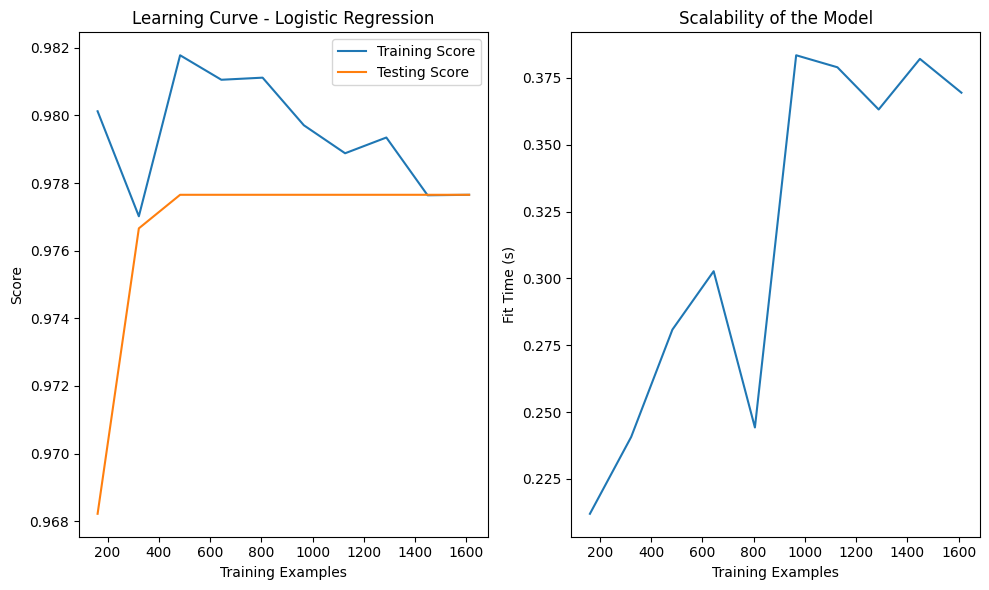

In [527]:
# Plotting learning curve untuk model Logistic Regression
plot_learning_curve(modelLogistic, X_train, y_train, 'Logistic Regression')

### Lasso Comparison

In [528]:
# ROC AUC Score untuk model Lasso Regression pada data uji
roc_auc_lasso = roc_auc_score(y_test, lasso_model.predict(X_test))
print("ROC AUC Score - Lasso Regression:", roc_auc_lasso)

ROC AUC Score - Lasso Regression: 0.5914888869900405


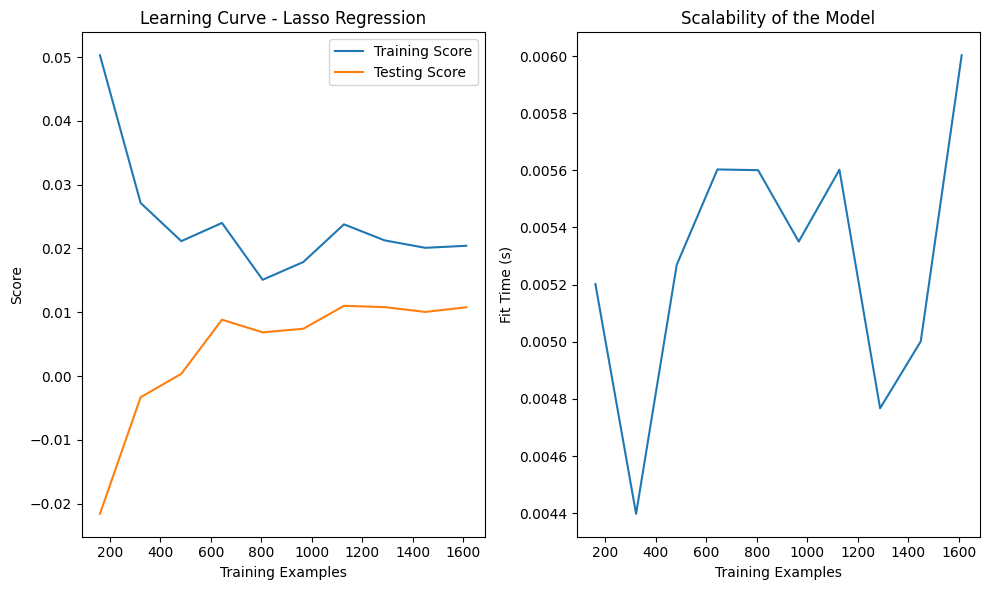

In [529]:
# Plotting learning curve untuk model Lasso Regression
plot_learning_curve(lasso_model, X_train, y_train, 'Lasso Regression')

## Ridge Comparison

In [530]:
# ROC AUC Score untuk model Ridge Regression pada data uji
roc_auc_ridge = roc_auc_score(y_test, model_ridge.predict(X_test))
print("ROC AUC Score - Ridge Regression:", roc_auc_ridge)

ROC AUC Score - Ridge Regression: 0.9822908655900197


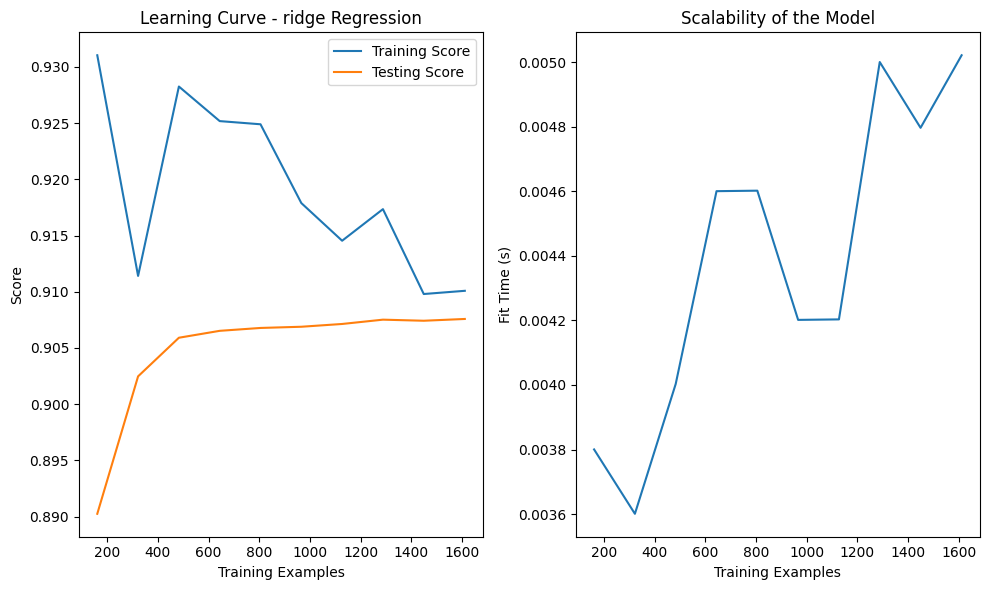

In [531]:
# Plotting learning curve untuk model Ridge Regression
plot_learning_curve(model_ridge, X_train, y_train, 'ridge Regression')